<a href="https://colab.research.google.com/github/sahin-arslan/SayisalGoruntuIsleme/blob/main/234312029_Sahin_Arslan_SG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Şahin Arslan

Bu dersin arasınavında , [ChestX-ray8 dataset](https://arxiv.org/abs/1705.02315) veri seti'nden alınan göğüs röntgeni görüntüleriyle çalışacaksınız.
<img src="https://raw.githubusercontent.com/hardik0/AI-for-Medicine-Specialization/master/AI-for-Medical-Diagnosis/Week-1/xray-image.png" alt="U-net Image" width="300" align="middle"/>



In [ ]:
!git clone https://github.com/hardik0/AI-for-Medicine-Specialization
%cd AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis/

Cloning into 'AI-for-Medicine-Specialization'...
remote: Enumerating objects: 1601, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 1601 (delta 9), reused 2 (delta 0), pack-reused 1573 (from 1)
Receiving objects: 100% (1601/1601), 720.36 MiB | 31.46 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (1497/1497), done.
/content/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis


## 1. Veri Yükleme

**1.	Kütüphanelerin İçe Aktarılması**


*   Veri işleme için pandas, sayısal işlemler için numpy, görselleştirme için matplotlib ve seaborn kütüphanelerini içe aktarın.
*   Ayrıca os modülünü kullanarak dosya yolunu belirtin.


In [ ]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For enhanced visualizations
import os  # For file path management

# Set seaborn style for better aesthetics
sns.set()

**2.	Veri Setinin Yüklenmesi**


*   train_df olarak adlandırılan veri çerçevesine CSV dosyasını yükleyin ve ilk birkaç satırı inceleyin.
*   Toplam satır ve sütun sayısını ekrana yazdırın.


In [ ]:
# Assuming your CSV file is named 'train-small.csv' and is located in the 'nih/' directory
train_df = pd.read_csv("nih/train-small.csv")

# Display the first 10 rows of the DataFrame
train_df.head(10)


Image  Atelectasis  Cardiomegaly  Consolidation  Edema  \
0  00008270_015.png            0             0              0      0   
1  00029855_001.png            1             0              0      0   
2  00001297_000.png            0             0              0      0   
3  00012359_002.png            0             0              0      0   
4  00017951_001.png            0             0              0      0   
5  00001232_002.png            1             1              0      0   
6  00017135_000.png            0             0              0      0   
7  00027235_000.png            0             0              0      0   
8  00014197_007.png            0             0              0      0   
9  00011584_002.png            0             0              0      0   

   Effusion  Emphysema  Fibrosis  Hernia  Infiltration  Mass  Nodule  \
0         0          0         0       0             0     0       0   
1         1          0         0       0             1     0       0   
2         0          0         0       0             0     0       0   
3         0          0         0       0             0     0       0   
4         0          0         0       0             1     0       0   
5         1          0         0       0             1     0       0   
6         0          0         0       0             0     0       0   
7         0          0         0       0             0     0       0   
8         0          0         0       0             0     0       0   
9         0          0         0       0             0     0       0   

   PatientId  Pleural_Thickening  Pneumonia  Pneumothorax  
0       8270                   0          0             0  
1      29855                   0          0             0  
2       1297                   1          0             0  
3      12359                   0          0             0  
4      17951                   0          0             0  
5       1232                   0          0             0  
6      17135                   0          0             0  
7      27235                   0          0             0  
8      14197                   0          0             0  
9      11584                   0          0             0

In [ ]:

# Print the total number of rows and columns
print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this data frame')

There are 1000 rows and 16 columns in this data frame


**3.	Veri Özelliklerinin İncelenmesi**

*   Sütunlardaki veri türlerini ve eksik değerleri inceleyin.



In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

*   PatientId sütunundaki benzersiz hasta sayısını analiz edin ve her bir hastanın birden fazla görüntüsü olup olmadığını belirleyin.

In [ ]:
total_patient_ids = train_df['PatientId'].count()
unique_patient_ids = train_df['PatientId'].nunique()

print(f"The total patient ids are {total_patient_ids}, from those the unique ids are {unique_patient_ids}")

if total_patient_ids > unique_patient_ids:
    print("There are patients with multiple images in the dataset.")
else:
    print("Each patient has only one image in the dataset.")

The total patient ids are 1000, from those the unique ids are 928
There are patients with multiple images in the dataset.


## 2. Görüntü Yükleme ve Görselleştirme

**1.	Rastgele Görüntüler Seçme**


*   train_df içindeki "Image" sütunundan rastgele 9 görüntü seçin.


In [ ]:
# Extract numpy values from Image column in data frame
images = train_df['Image'].values

random_images_count = 9

# Extract 9 random images from it
random_images = [np.random.choice(images) for i in range(random_images_count)]

# Print the filenames of the random images
print(random_images)

['00027547_006.png', '00012829_010.png', '00011484_000.png', '00005646_012.png', '00001738_005.png', '00006053_000.png', '00020318_004.png', '00002660_001.png', '00013003_012.png']


*   Bu görüntüleri yan yana görselleştirerek veri setindeki örnek görüntüleri inceleyin

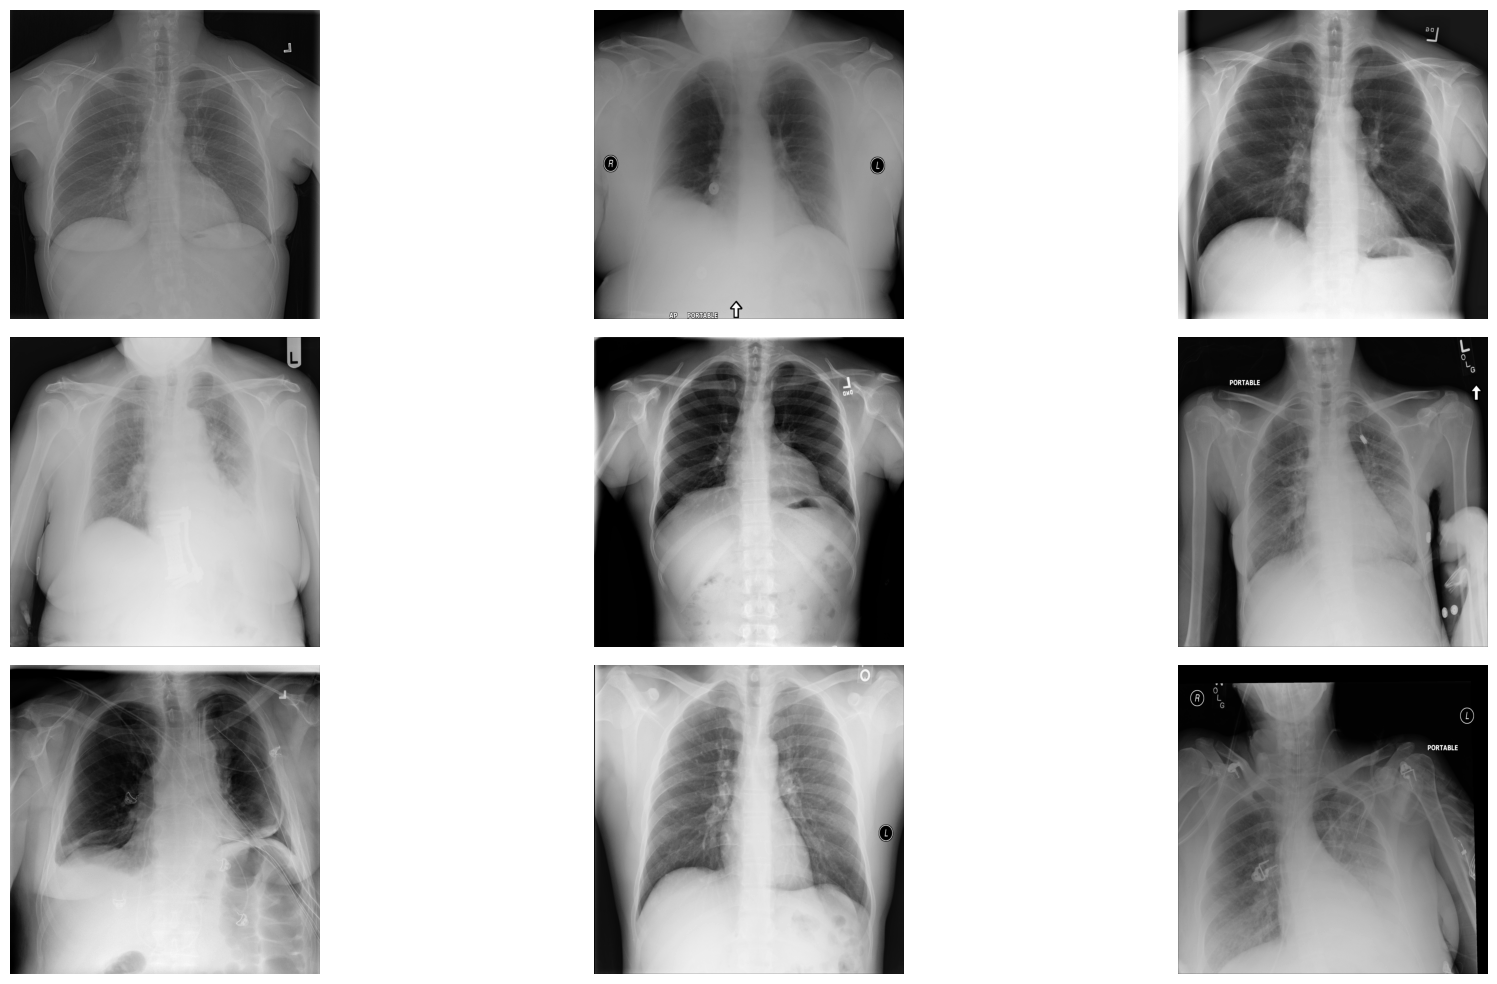

In [ ]:
# Assuming you have already extracted the random_images list as described in the previous response

# Location of the image dir
img_dir = 'nih/images_small/'

# Adjust the size of your images
plt.figure(figsize=(20, 10))

# Iterate and plot random images
for i in range(random_images_count):
    plt.subplot(3, 3, i + 1)  # Create a subplot grid of 3 rows and 3 columns
    img = plt.imread(os.path.join(img_dir, random_images[i]))  # Read the image
    plt.imshow(img, cmap='gray')  # Display the image in grayscale
    plt.axis('off')  # Turn off axis labels and ticks

# Adjust subplot parameters to give specified padding
plt.tight_layout()
plt.show()  # Display the plot

**2.	Rastgele Görüntülerin İstatistiksel Özelliklerini Hesaplama**

*  Seçilen görüntülerin her biri için maksimum, minimum, ortalama ve standart sapma değerlerini hesaplayın.




In [ ]:
# Assuming you have already extracted the random_images list and img_dir as described before

for image_filename in random_images:
    # Read the image
    img_path = os.path.join(img_dir, image_filename)
    img = plt.imread(img_path)

    # Calculate statistics
    maximum = img.max()
    minimum = img.min()
    mean = img.mean()
    std_dev = img.std()

    # Print the statistics for the current image
    print(f"Image: {image_filename}")
    print(f"  Maximum: {maximum:.4f}")
    print(f"  Minimum: {minimum:.4f}")
    print(f"  Mean: {mean:.4f}")
    print(f"  Standard Deviation: {std_dev:.4f}")
    print("-" * 20)  # Separator between images

Image: 00027547_006.png
  Maximum: 1.0000
  Minimum: 0.0000
  Mean: 0.3793
  Standard Deviation: 0.1767
--------------------
Image: 00012829_010.png
  Maximum: 1.0000
  Minimum: 0.0000
  Mean: 0.4698
  Standard Deviation: 0.1862
--------------------
Image: 00011484_000.png
  Maximum: 0.9608
  Minimum: 0.0000
  Mean: 0.4855
  Standard Deviation: 0.2572
--------------------
Image: 00005646_012.png
  Maximum: 0.9451
  Minimum: 0.0196
  Mean: 0.6068
  Standard Deviation: 0.2041
--------------------
Image: 00001738_005.png
  Maximum: 0.9922
  Minimum: 0.0000
  Mean: 0.4172
  Standard Deviation: 0.2923
--------------------
Image: 00006053_000.png
  Maximum: 1.0000
  Minimum: 0.0000
  Mean: 0.4397
  Standard Deviation: 0.2380
--------------------
Image: 00020318_004.png
  Maximum: 0.9725
  Minimum: 0.0000
  Mean: 0.5101
  Standard Deviation: 0.2504
--------------------
Image: 00002660_001.png
  Maximum: 1.0000
  Minimum: 0.0000
  Mean: 0.6489
  Standard Deviation: 0.2268
--------------------


**3.	Histogram Çizimi**

*   Seçilen 9 görüntünün her biri için piksel yoğunluk dağılımını gösteren histogramlar oluşturun.


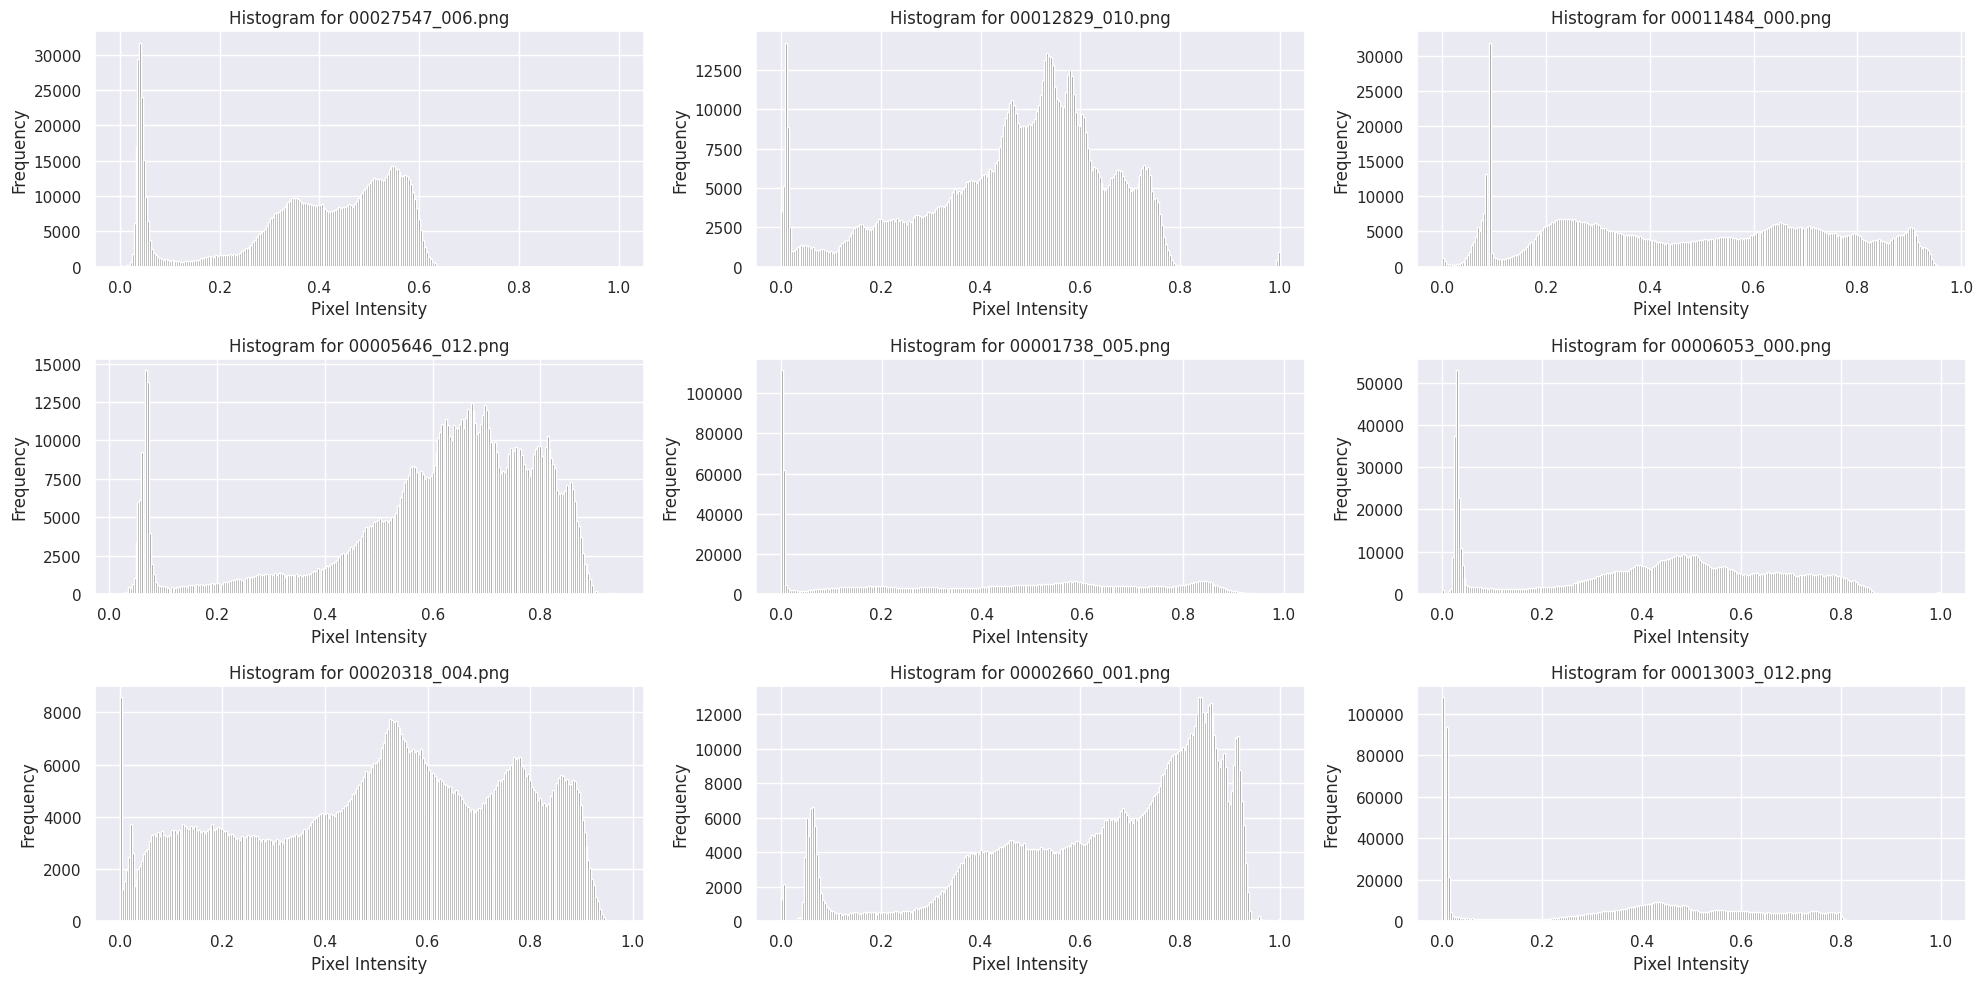

In [ ]:
# Assuming you have already extracted random_images and img_dir

plt.figure(figsize=(20, 10))  # Adjust figure size as needed

for i, image_filename in enumerate(random_images):
    # Read the image
    img_path = os.path.join(img_dir, image_filename)
    img = plt.imread(img_path)

    # Create and display the histogram
    plt.subplot(3, 3, i + 1)
    plt.hist(img.ravel(), bins=256, color='gray')  # Adjust bins as needed
    plt.title(f"Histogram for {image_filename}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## 3. Görüntü İşleme ve İyileştirme

**1.	Kontrast Germe (Stretching)**

*   Minimum ve maksimum piksel değerlerini kullanarak kontrast germe işlemi yapın.

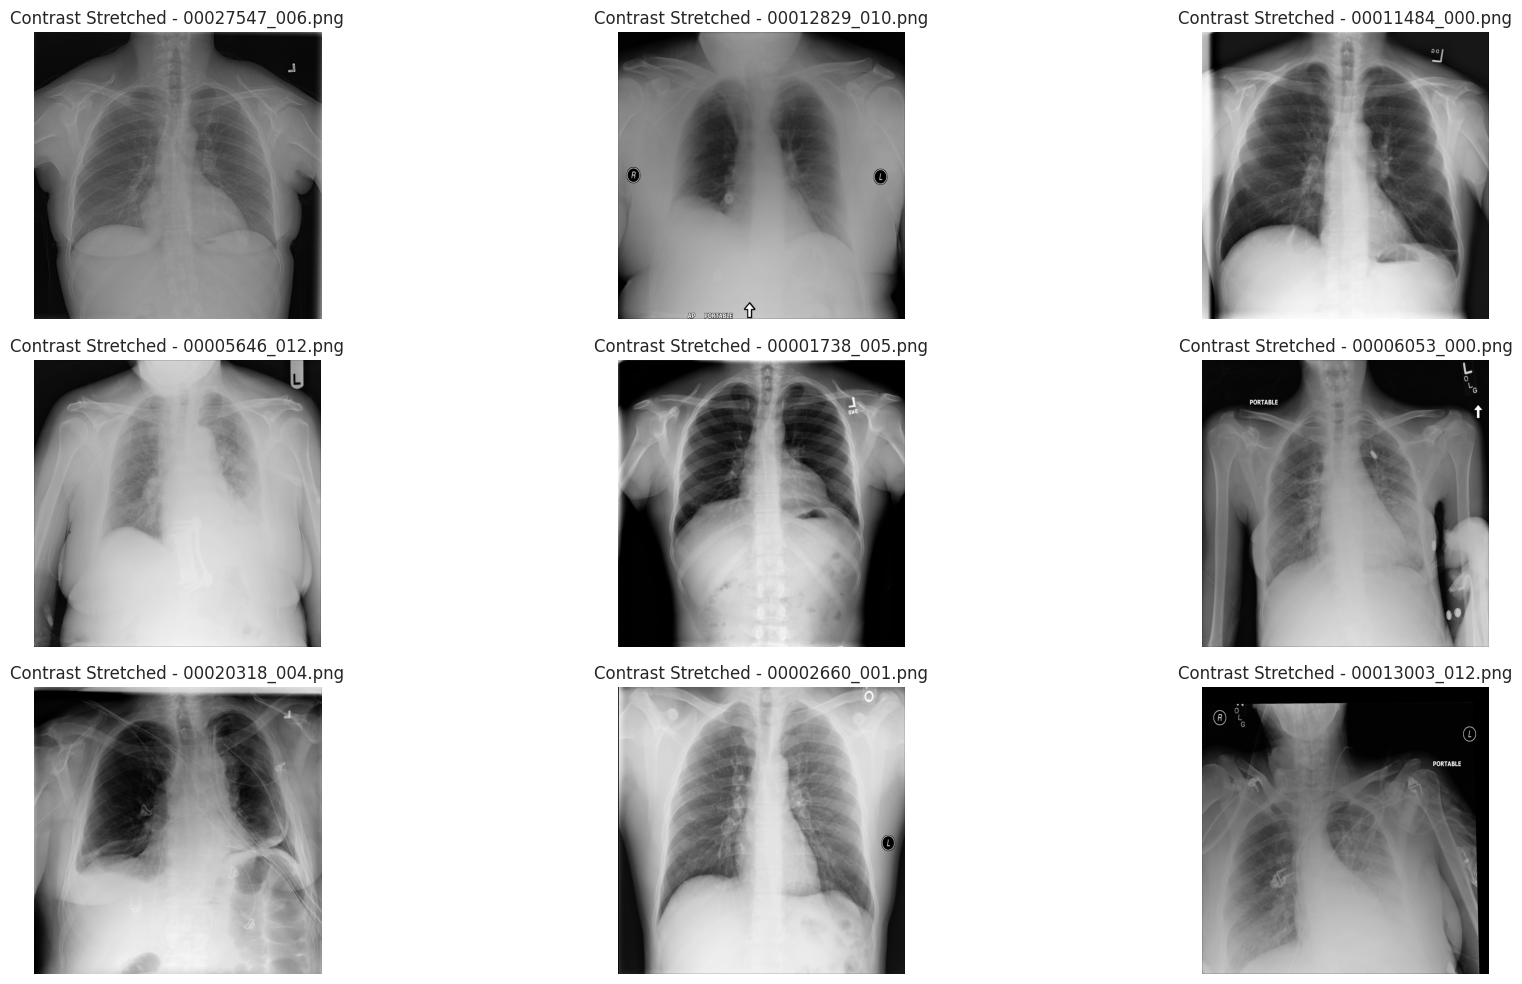

In [ ]:
# Assuming you have already extracted random_images and img_dir

plt.figure(figsize=(20, 10))  # Adjust figure size as needed

for i, image_filename in enumerate(random_images):
    # Read the image
    img_path = os.path.join(img_dir, image_filename)
    img = plt.imread(img_path)

    # Perform contrast stretching
    pmin, pmax = img.min(), img.max()
    img_stretched = (img - pmin) / (pmax - pmin)  # Normalize to [0, 1]
    img_stretched = (img_stretched * 255).astype(np.uint8) # Scale to [0, 255] for display

    # Display the original and stretched images
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_stretched, cmap='gray')
    plt.title(f"Contrast Stretched - {image_filename}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**2.	Histogram Eşitleme (Equalization)**

*   Kontrast germe işlemi sonrası histogram eşitleme uygulayarak kontrastı artırın.


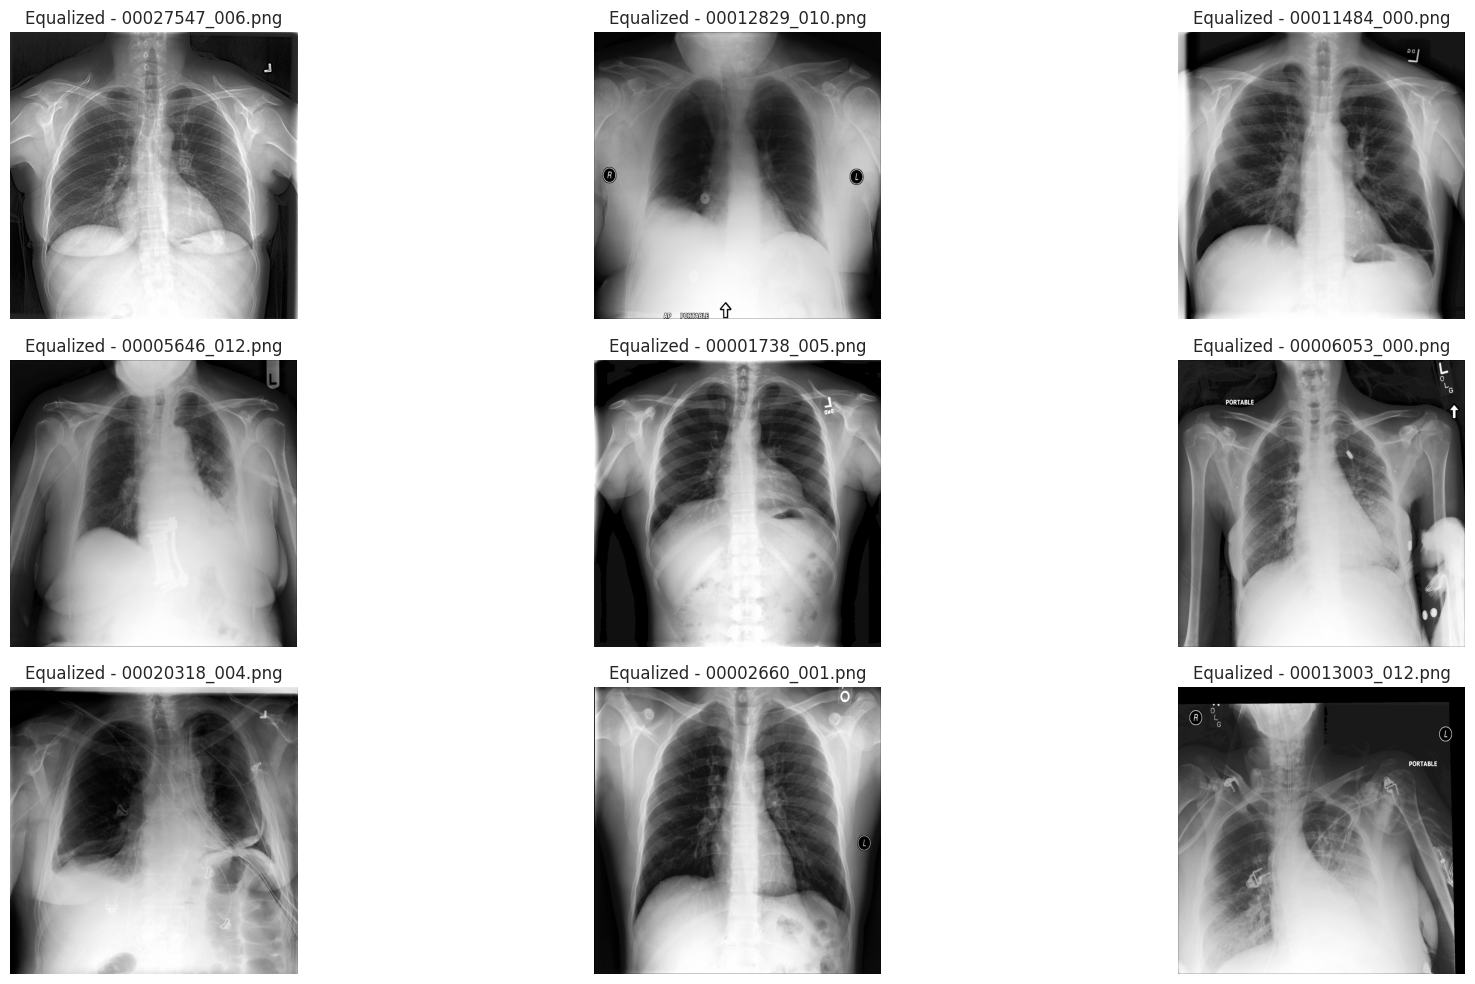

In [ ]:
from skimage import exposure # Import the exposure module from skimage

plt.figure(figsize=(20, 10))  # Adjust figure size as needed

for i, image_filename in enumerate(random_images):
    # Read the image
    img_path = os.path.join(img_dir, image_filename)
    img = plt.imread(img_path)

    # Perform contrast stretching
    pmin, pmax = img.min(), img.max()
    img_stretched = (img - pmin) / (pmax - pmin)
    img_stretched = (img_stretched * 255).astype(np.uint8)

    # Apply histogram equalization
    img_equalized = exposure.equalize_hist(img_stretched)
    img_equalized = (img_equalized * 255).astype(np.uint8) # Scale to [0, 255]

    # Display the equalized image
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_equalized, cmap='gray')
    plt.title(f"Equalized - {image_filename}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**3.	Gamma Düzeltme**

*   Gamma düzeltme yöntemi ile görüntünün parlaklığını ayarlayın.


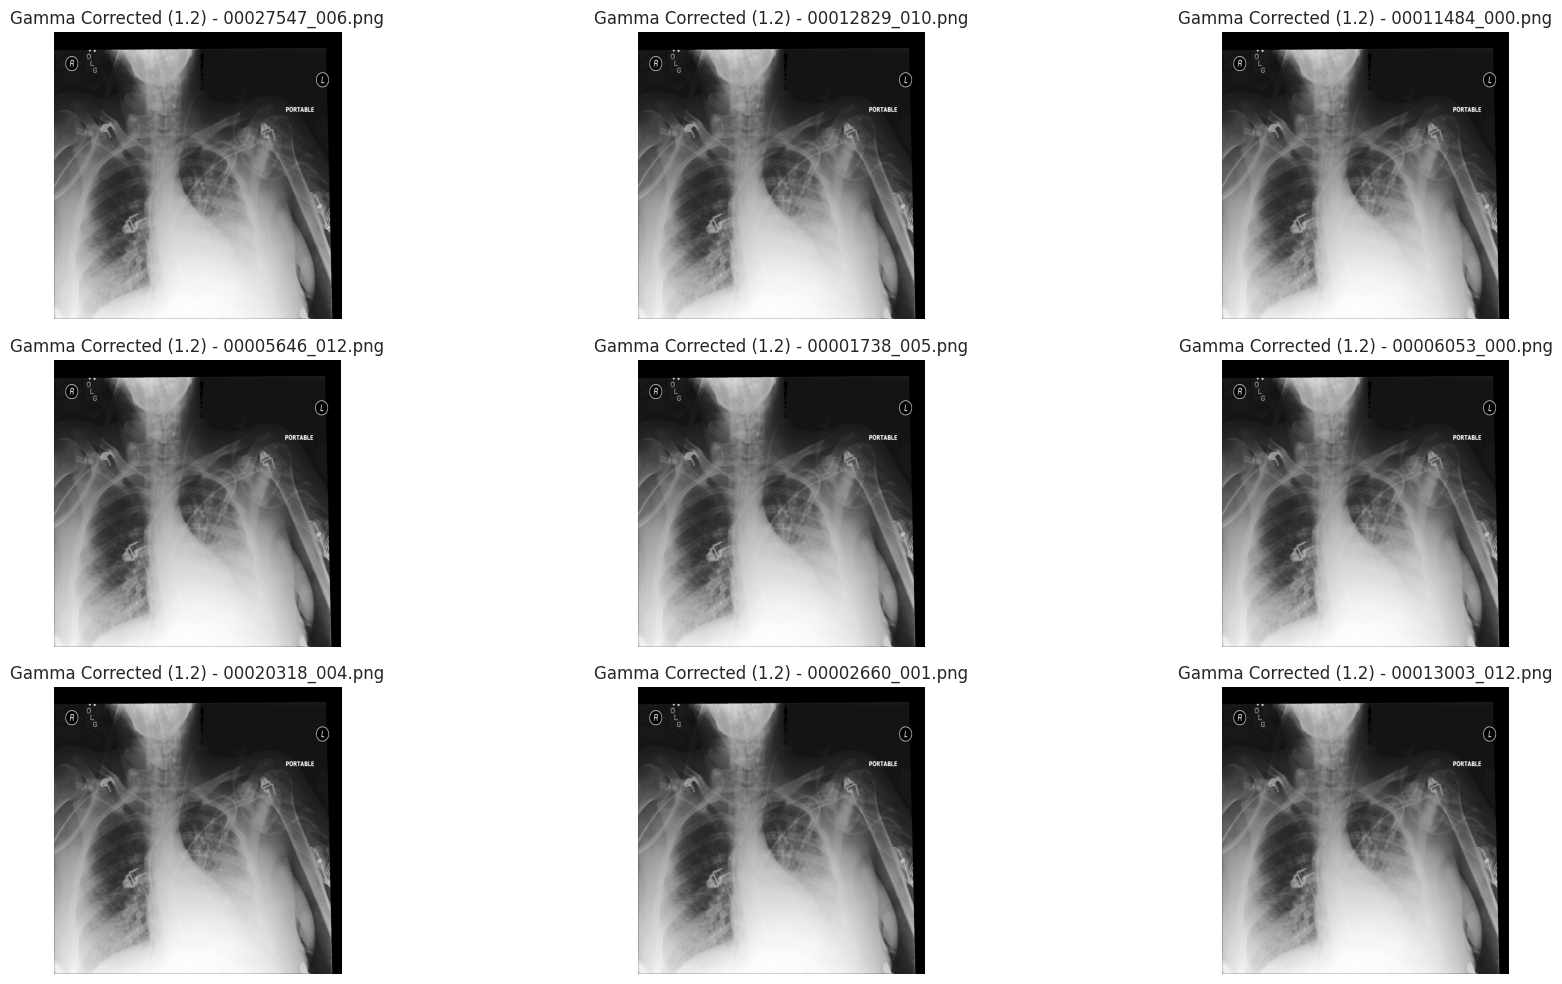

In [ ]:
plt.figure(figsize=(20, 10))  # Adjust figure size as needed

for i, image_filename in enumerate(random_images):
    # Read the image
    img_path = os.path.join(img_dir, image_filename)
    img = plt.imread(img_path)

    # Perform contrast stretching and equalization (if desired)
    # ... (code from previous steps) ...
    #This is the same code, just to remind you it is best practice to apply these enhancements before gamma correction

    # Apply gamma correction
    gamma = 1.2  # Adjust this value to control brightness
    img_gamma_corrected = np.power(img_equalized / 255.0, gamma) * 255
    img_gamma_corrected = img_gamma_corrected.astype(np.uint8)
    #Rescale values to 0-255 and change format

    # Display the gamma-corrected image
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_gamma_corrected, cmap='gray')
    plt.title(f"Gamma Corrected ({gamma}) - {image_filename}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## 4. Gürültü Azaltma

**1.	Median ve Gaussian Blur Uygulama**

*   Gamma düzeltilmiş görüntüye median ve gaussian blur uygulayın ve sonuçları karşılaştırın.


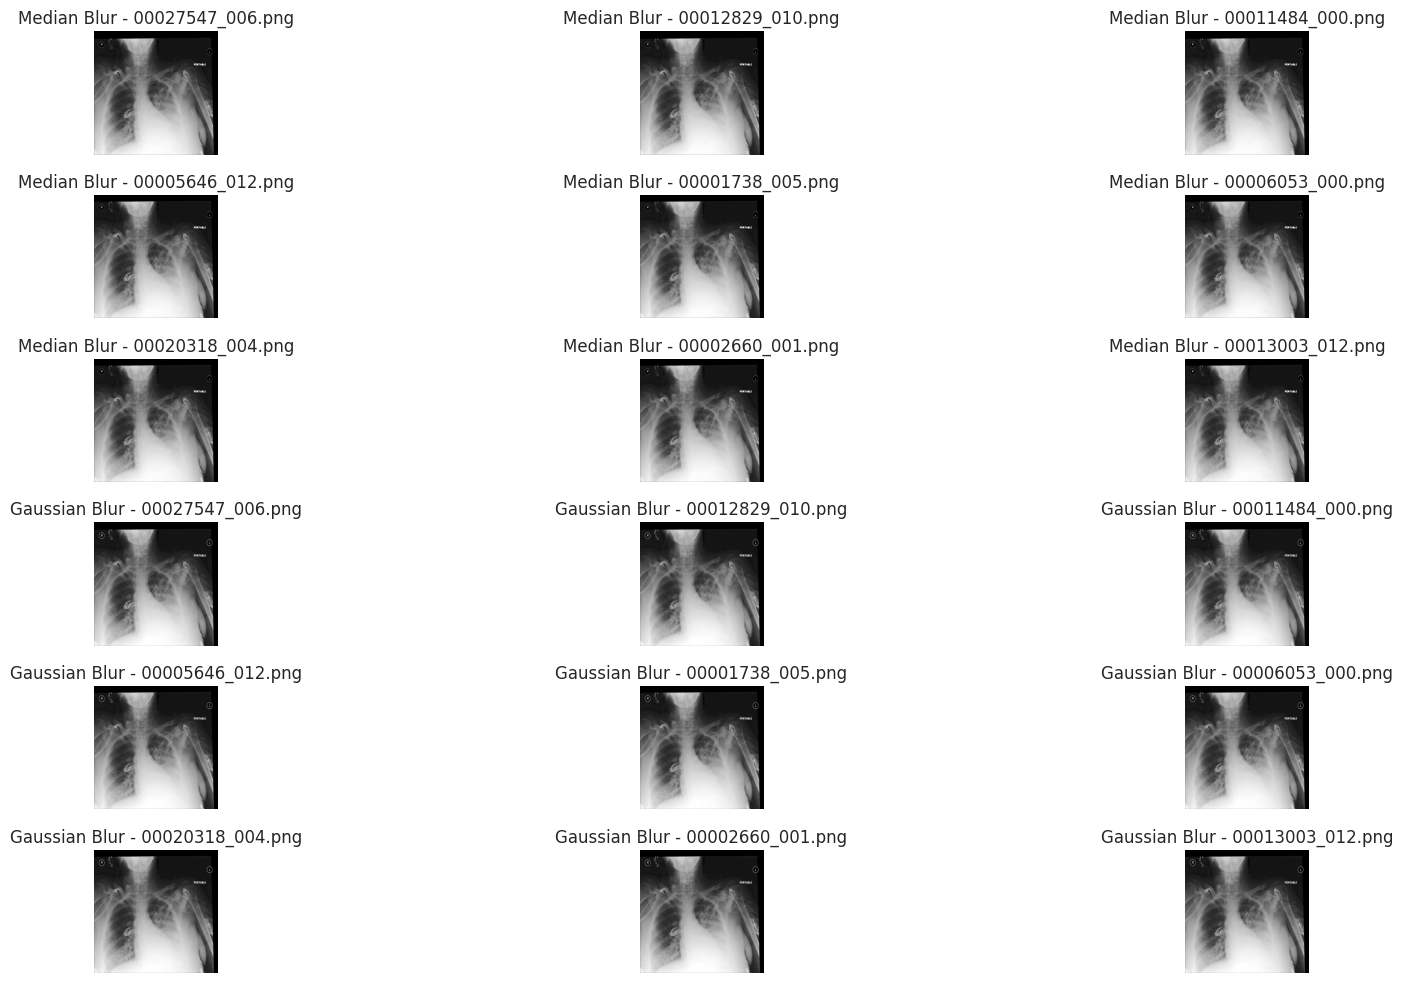

In [ ]:
import cv2 # Import the OpenCV library
import matplotlib.pyplot as plt
import os
import numpy as np

plt.figure(figsize=(20, 10))  # Adjust figure size as needed

# Calculate the number of rows needed for the subplots
num_rows = len(random_images) * 2 // 3 + (len(random_images) * 2 % 3 > 0)

#changed 3 to num_rows in this line
for i, image_filename in enumerate(random_images):
    # Read the image and apply previous enhancements
    #... (code from previous steps) ...

    # Apply Median Blur
    median_blurred = cv2.medianBlur(img_gamma_corrected, 5) # 5 is the kernel size

    # Apply Gaussian Blur
    gaussian_blurred = cv2.GaussianBlur(img_gamma_corrected, (5, 5), 0) # (5, 5) is the kernel size, 0 is the standard deviation

    # Display the blurred images
    #changed to i+1
    plt.subplot(num_rows, 3, i + 1)
    plt.imshow(median_blurred, cmap='gray')  # Display median blurred image
    plt.title(f"Median Blur - {image_filename}")
    plt.axis('off')

    #changed to i+len(random_images) + 1
    plt.subplot(num_rows, 3, i+len(random_images) + 1)
    plt.imshow(gaussian_blurred, cmap='gray')  # Display Gaussian blurred image
    plt.title(f"Gaussian Blur - {image_filename}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## 5. Döndürme ve Ayna Çevirme (Flipping)

**1.	Rastgele Açılarla Döndürme**

*   Görüntüyü 0 ile 10 derece arasında rastgele bir açıda döndürün.

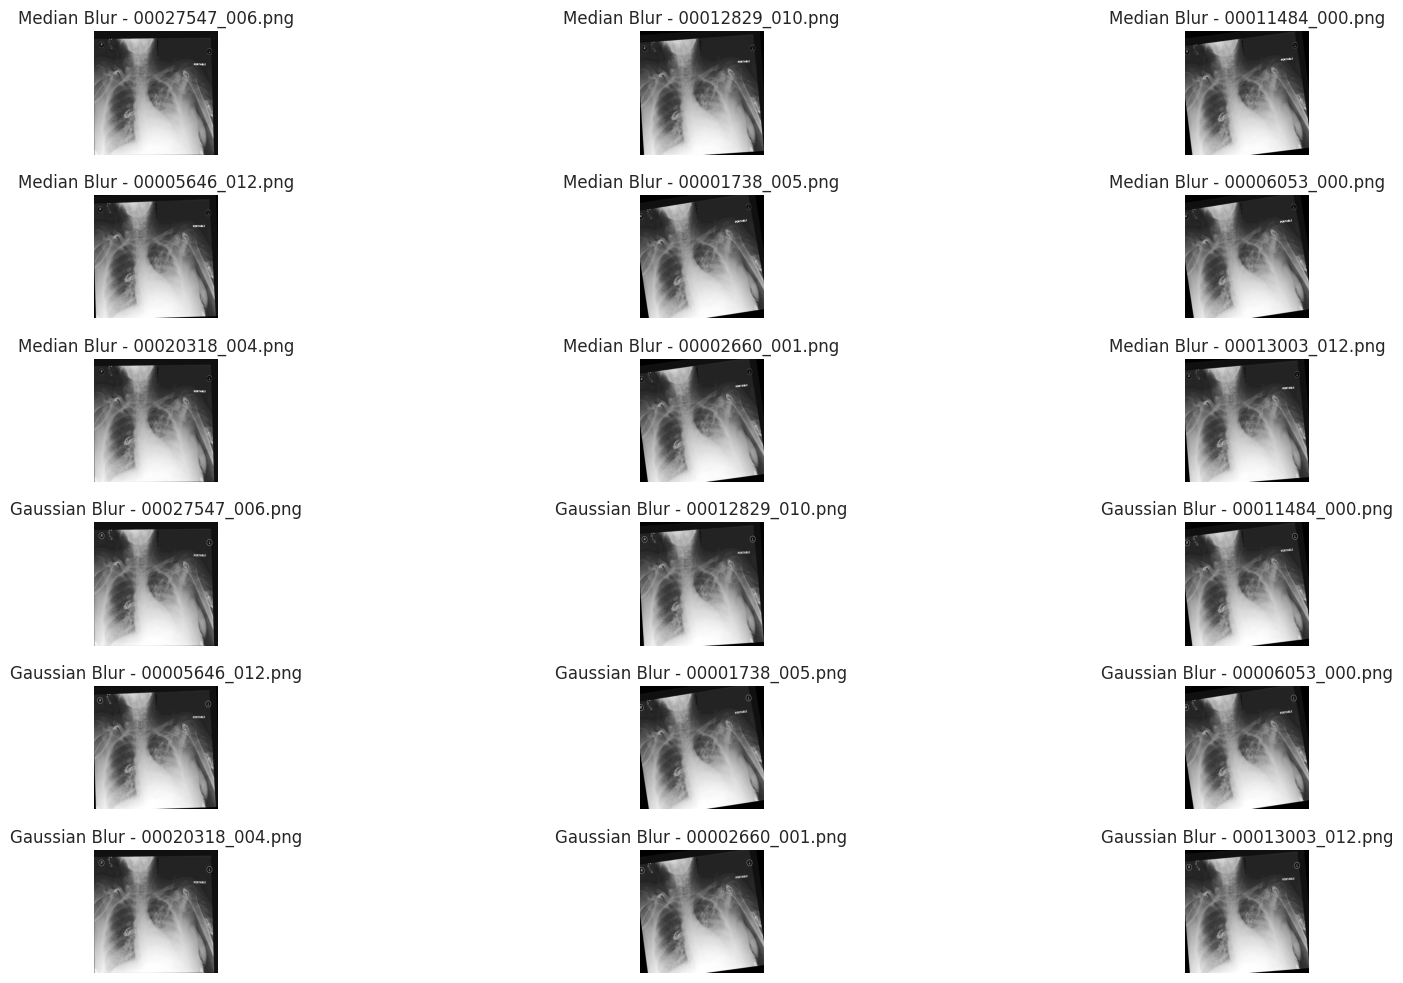

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import random

plt.figure(figsize=(20, 10))  # Adjust figure size as needed

# Calculate the number of rows needed for the subplots
num_rows = len(random_images) * 2 // 3 + (len(random_images) * 2 % 3 > 0)

for i, image_filename in enumerate(random_images):
    # Read the image and apply previous enhancements
    #... (code from previous steps) ...

    # Apply Median Blur
    median_blurred = cv2.medianBlur(img_gamma_corrected, 5)

    # Apply Gaussian Blur
    gaussian_blurred = cv2.GaussianBlur(img_gamma_corrected, (5, 5), 0)

    # --- Rotate Images ---
    # Generate a random angle between 0 and 10 degrees
    angle = random.uniform(0, 10)

    # Get image dimensions
    (h, w) = median_blurred.shape[:2]
    center = (w // 2, h // 2)

    # Get rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Rotate the images
    rotated_median = cv2.warpAffine(median_blurred, M, (w, h))
    rotated_gaussian = cv2.warpAffine(gaussian_blurred, M, (w, h))

    # Display the blurred images
    plt.subplot(num_rows, 3, i + 1)
    plt.imshow(rotated_median, cmap='gray')
    plt.title(f"Median Blur - {image_filename}")
    plt.axis('off')

    plt.subplot(num_rows, 3, i + len(random_images) + 1)
    plt.imshow(rotated_gaussian, cmap='gray')
    plt.title(f"Gaussian Blur - {image_filename}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**2.	Ayna Çevirme**

*   Görüntüyü yatay olarak çevirin ve sonucu görselleştirin.


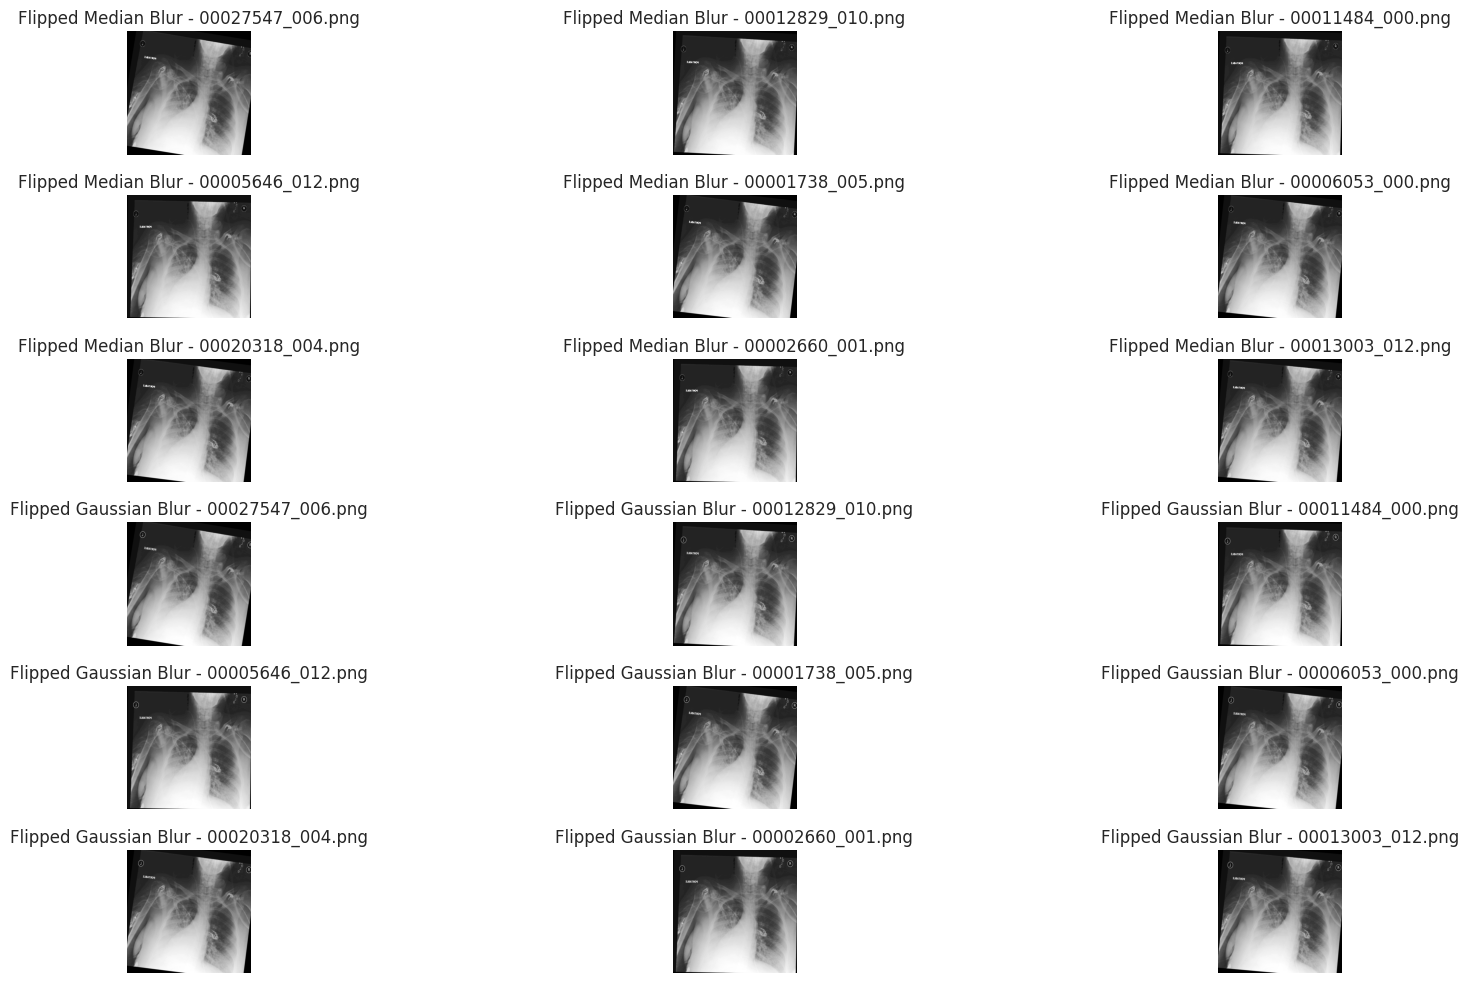

In [ ]:
plt.figure(figsize=(20, 10))  # Adjust figure size as needed

# Calculate the number of rows needed for the subplots
num_rows = len(random_images) * 2 // 3 + (len(random_images) * 2 % 3 > 0)

for i, image_filename in enumerate(random_images):
    # Read the image and apply previous enhancements
    #... (code from previous steps) ...

    # Apply Median Blur
    median_blurred = cv2.medianBlur(img_gamma_corrected, 5)

    # Apply Gaussian Blur
    gaussian_blurred = cv2.GaussianBlur(img_gamma_corrected, (5, 5), 0)

    # --- Rotate Images ---
    angle = random.uniform(0, 10)
    (h, w) = median_blurred.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_median = cv2.warpAffine(median_blurred, M, (w, h))
    rotated_gaussian = cv2.warpAffine(gaussian_blurred, M, (w, h))

    # --- Flip Images Horizontally ---
    flipped_median = cv2.flip(rotated_median, 1)  # 1 indicates horizontal flip
    flipped_gaussian = cv2.flip(rotated_gaussian, 1)

    # Display the images
    plt.subplot(num_rows, 3, i + 1)
    plt.imshow(flipped_median, cmap='gray')
    plt.title(f"Flipped Median Blur - {image_filename}")
    plt.axis('off')

    plt.subplot(num_rows, 3, i + len(random_images) + 1)
    plt.imshow(flipped_gaussian, cmap='gray')
    plt.title(f"Flipped Gaussian Blur - {image_filename}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## 6. Frekans Alanında Filtreleme

**1.	Fourier Dönüşümü ve Filtreleme**

*   Fourier dönüşümü ile görüntüyü frekans alanına çevirin, düşük frekansları geçiren bir maske uygulayın, ardından ters Fourier dönüşümü ile frekans alanında filtreleme yapın.


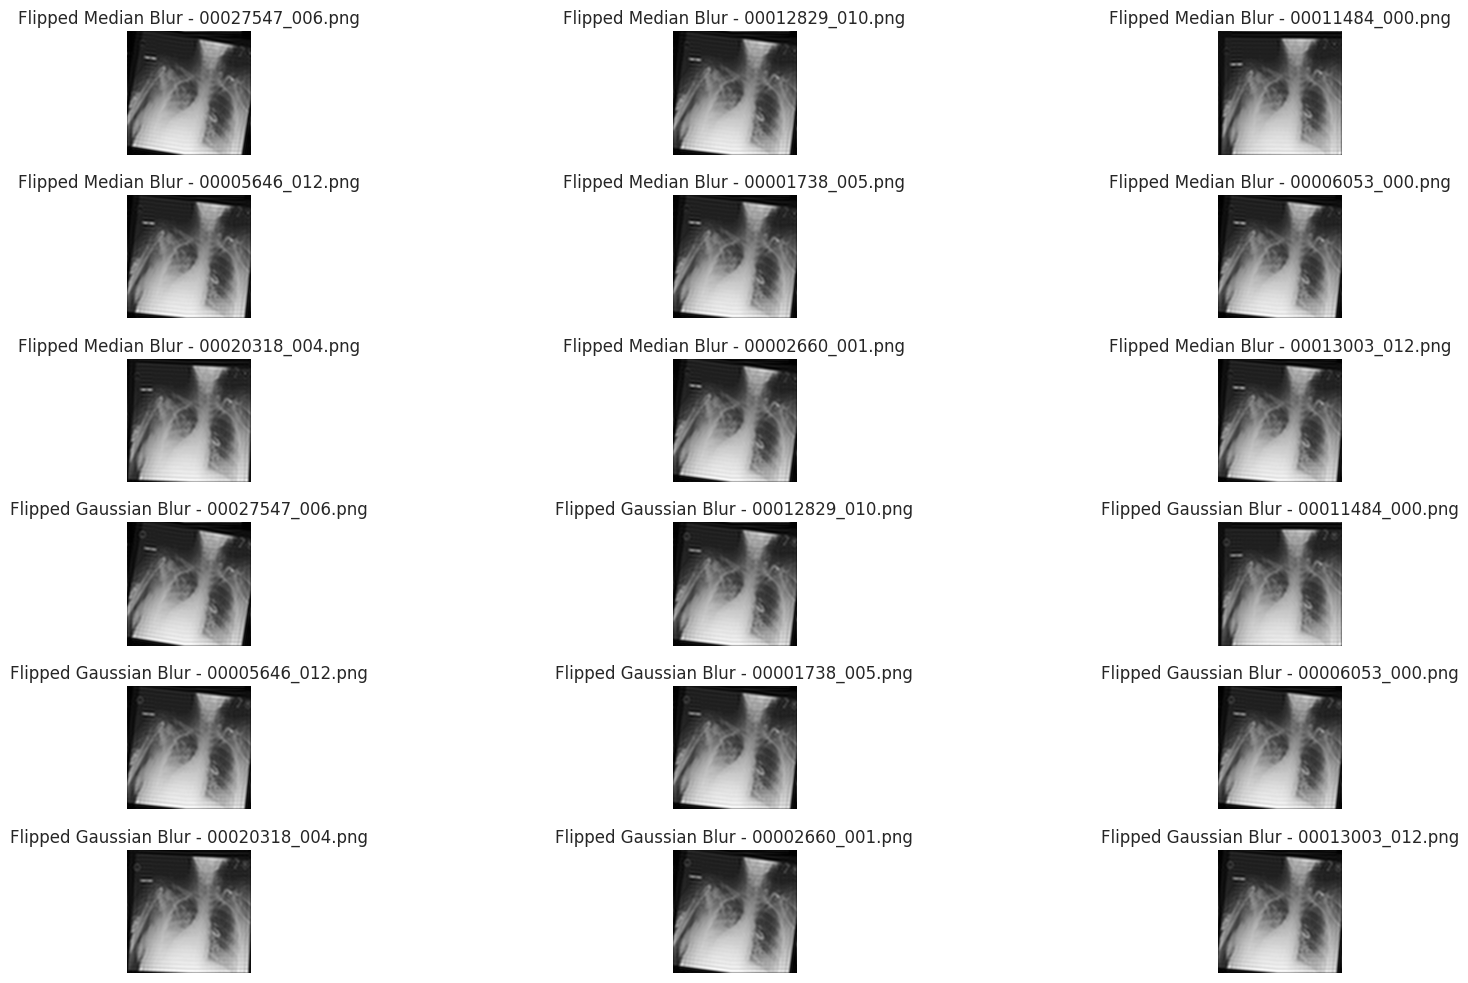

In [ ]:
plt.figure(figsize=(20, 10))  # Adjust figure size as needed

# Calculate the number of rows needed for the subplots
num_rows = len(random_images) * 2 // 3 + (len(random_images) * 2 % 3 > 0)

for i, image_filename in enumerate(random_images):
    # Read the image and apply previous enhancements
    #... (code from previous steps) ...

    # Apply Median Blur
    median_blurred = cv2.medianBlur(img_gamma_corrected, 5)

    # Apply Gaussian Blur
    gaussian_blurred = cv2.GaussianBlur(img_gamma_corrected, (5, 5), 0)

    # --- Rotate Images ---
    angle = random.uniform(0, 10)
    (h, w) = median_blurred.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_median = cv2.warpAffine(median_blurred, M, (w, h))
    rotated_gaussian = cv2.warpAffine(gaussian_blurred, M, (w, h))

    # --- Flip Images Horizontally ---
    flipped_median = cv2.flip(rotated_median, 1)
    flipped_gaussian = cv2.flip(rotated_gaussian, 1)

    # --- Fourier Transform and Filtering ---
    for img in [flipped_median, flipped_gaussian]:
        # 1. Fourier Transform
        dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
        dft_shift = np.fft.fftshift(dft)

        # 2. Create Mask (Low Pass Filter)
        rows, cols = img.shape
        crow, ccol = rows // 2, cols // 2
        mask = np.zeros((rows, cols, 2), np.uint8)
        mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 1

        # 3. Apply Mask and Inverse Fourier Transform
        fshift = dft_shift * mask
        f_ishift = np.fft.ifftshift(fshift)
        img_back = cv2.idft(f_ishift)
        img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

        # Assign the filtered image back to the original variable
        if img is flipped_median:
            flipped_median = img_back
        else:
            flipped_gaussian = img_back


    # Display the images
    plt.subplot(num_rows, 3, i + 1)
    plt.imshow(flipped_median, cmap='gray')
    plt.title(f"Flipped Median Blur - {image_filename}")
    plt.axis('off')

    plt.subplot(num_rows, 3, i + len(random_images) + 1)
    plt.imshow(flipped_gaussian, cmap='gray')
    plt.title(f"Flipped Gaussian Blur - {image_filename}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## 7. Keskinleştirme ve Enterpolasyon

**1.	Keskinleştirme**

*   Unsharp masking tekniği kullanarak görüntüyü keskinleştirin.


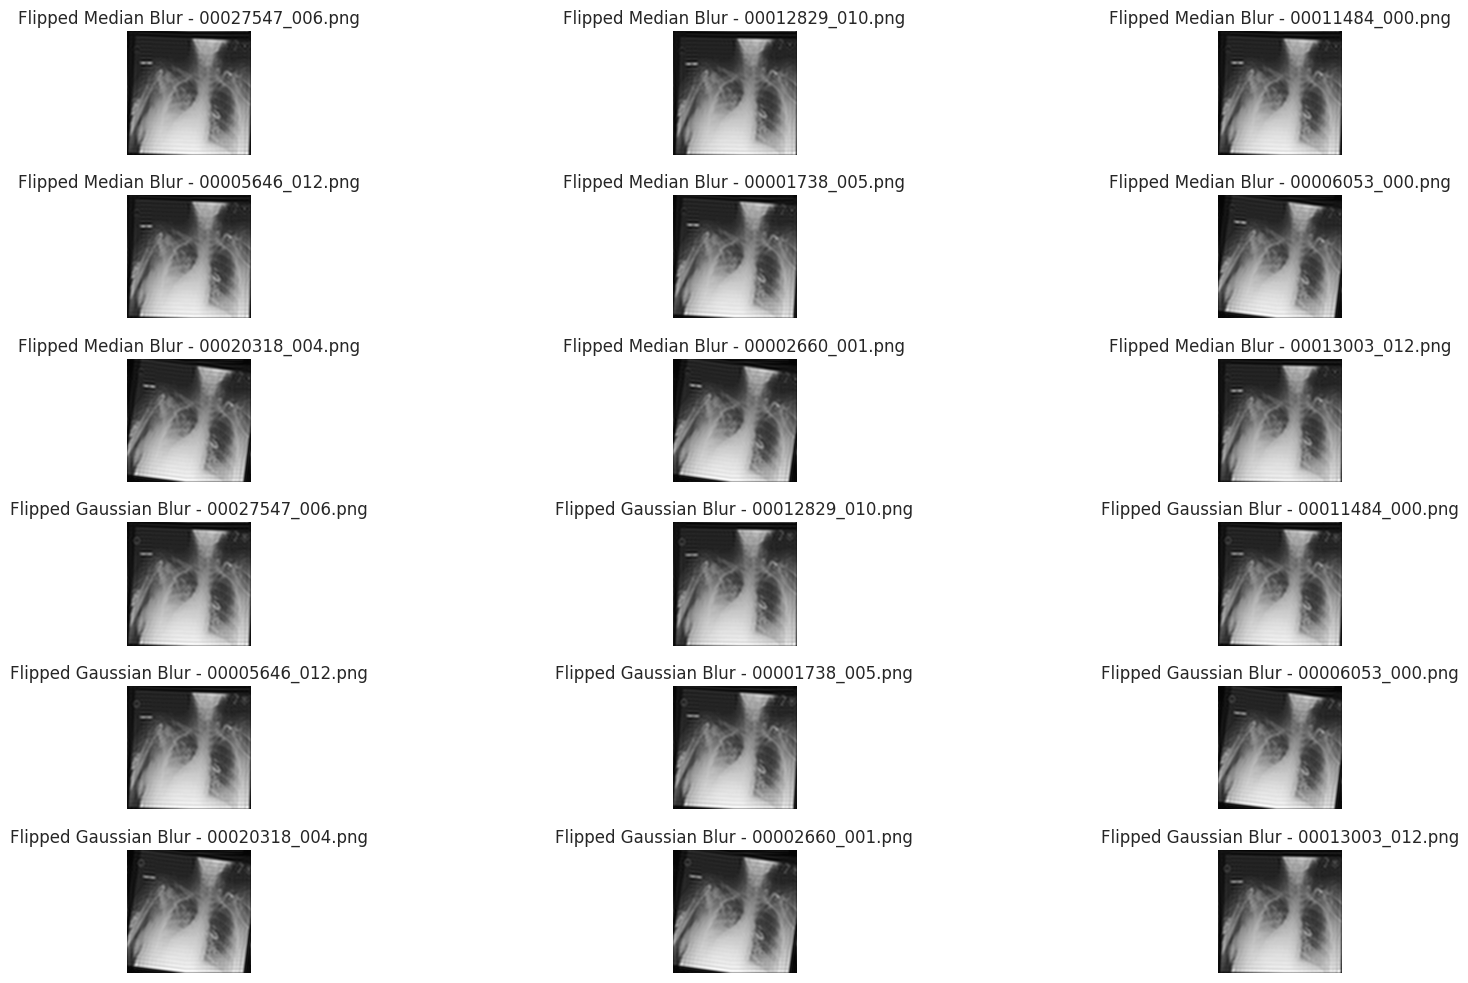

In [ ]:
plt.figure(figsize=(20, 10))  # Adjust figure size as needed

# Calculate the number of rows needed for the subplots
num_rows = len(random_images) * 2 // 3 + (len(random_images) * 2 % 3 > 0)

for i, image_filename in enumerate(random_images):
    # Read the image and apply previous enhancements
    #... (code from previous steps) ...

    # Apply Median Blur
    median_blurred = cv2.medianBlur(img_gamma_corrected, 5)

    # Apply Gaussian Blur
    gaussian_blurred = cv2.GaussianBlur(img_gamma_corrected, (5, 5), 0)

    # --- Rotate Images ---
    angle = random.uniform(0, 10)
    (h, w) = median_blurred.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_median = cv2.warpAffine(median_blurred, M, (w, h))
    rotated_gaussian = cv2.warpAffine(gaussian_blurred, M, (w, h))

    # --- Flip Images Horizontally ---
    flipped_median = cv2.flip(rotated_median, 1)
    flipped_gaussian = cv2.flip(rotated_gaussian, 1)

    # --- Fourier Transform and Filtering ---
    for img in [flipped_median, flipped_gaussian]:
        # 1. Fourier Transform
        dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
        dft_shift = np.fft.fftshift(dft)

        # 2. Create Mask (Low Pass Filter)
        rows, cols = img.shape
        crow, ccol = rows // 2, cols // 2
        mask = np.zeros((rows, cols, 2), np.uint8)
        mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 1

        # 3. Apply Mask and Inverse Fourier Transform
        fshift = dft_shift * mask
        f_ishift = np.fft.ifftshift(fshift)
        img_back = cv2.idft(f_ishift)
        img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

        # Assign the filtered image back to the original variable
        if img is flipped_median:
            flipped_median = img_back
        else:
            flipped_gaussian = img_back

    # --- Unsharp Masking ---
    for img in [flipped_median, flipped_gaussian]:
        # Gaussian Blur for the mask
        blurred = cv2.GaussianBlur(img.astype(np.float32), (5, 5), 10)

        # Unsharp Masking formula: original + amount * (original - blurred)
        sharpened = cv2.addWeighted(img.astype(np.float32), 1.5, blurred, -0.5, 0)

        # Assign the sharpened image back to the original variable
        if img is flipped_median:
            flipped_median = sharpened
        else:
            flipped_gaussian = sharpened

    # Display the images
    plt.subplot(num_rows, 3, i + 1)
    plt.imshow(flipped_median, cmap='gray')
    plt.title(f"Flipped Median Blur - {image_filename}")
    plt.axis('off')

    plt.subplot(num_rows, 3, i + len(random_images) + 1)
    plt.imshow(flipped_gaussian, cmap='gray')
    plt.title(f"Flipped Gaussian Blur - {image_filename}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**2.	Bicubic Enterpolasyon**

*   Keskinleştirilmiş görüntüyü iki kat büyüterek enterpolasyon uygulayın.


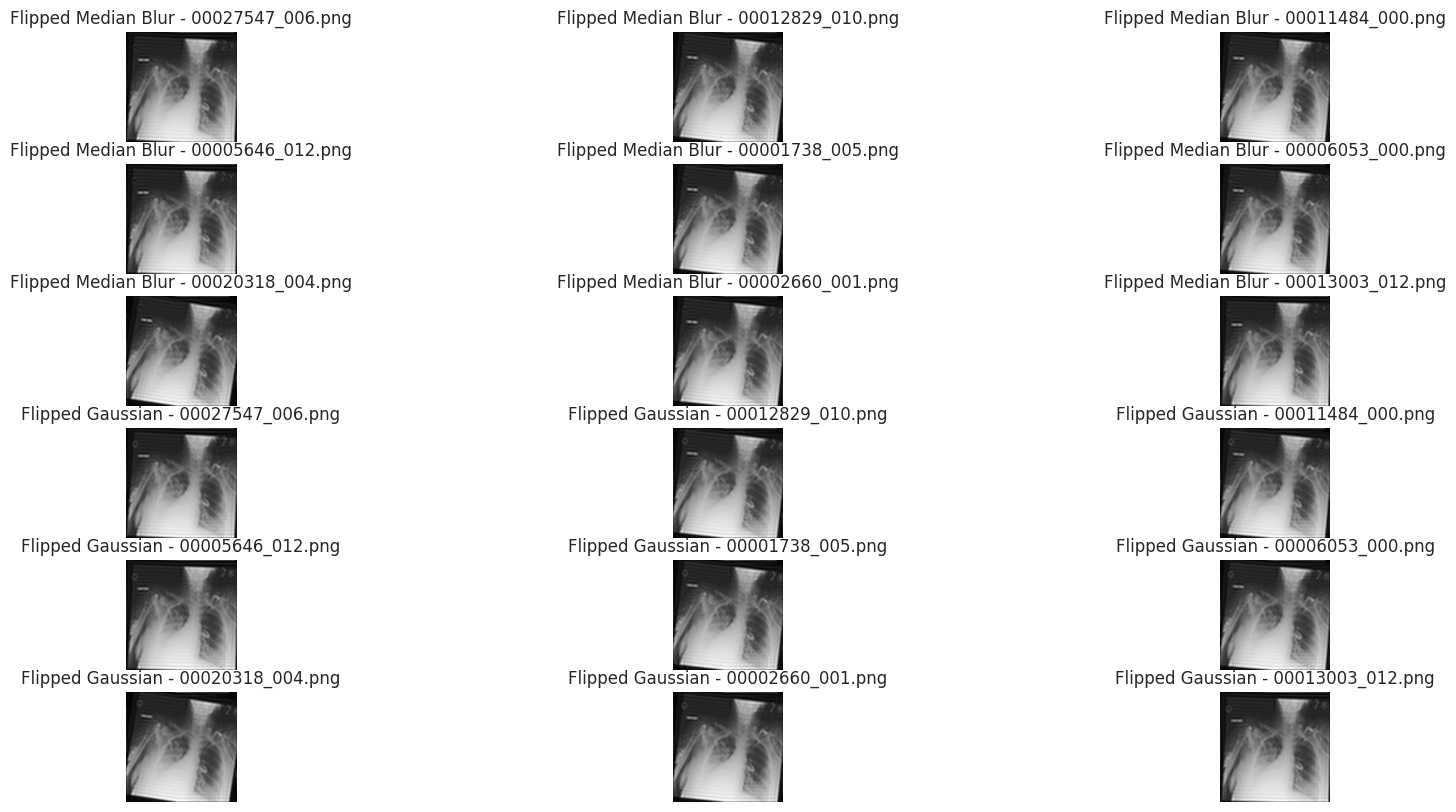

In [ ]:
plt.figure(figsize=(20, 10))  # Adjust figure size as needed

# Calculate the number of rows needed for the subplots
num_rows = len(random_images) * 2 // 3 + (len(random_images) * 2 % 3 > 0)

for i, image_filename in enumerate(random_images):
    # Read the image and apply previous enhancements
    #... (code from previous steps) ...

    # Apply Median Blur
    median_blurred = cv2.medianBlur(img_gamma_corrected, 5)

    # Apply Gaussian Blur
    gaussian_blurred = cv2.GaussianBlur(img_gamma_corrected, (5, 5), 0)

    # --- Rotate Images ---
    angle = random.uniform(0, 10)
    (h, w) = median_blurred.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_median = cv2.warpAffine(median_blurred, M, (w, h))
    rotated_gaussian = cv2.warpAffine(gaussian_blurred, M, (w, h))

    # --- Flip Images Horizontally ---
    flipped_median = cv2.flip(rotated_median, 1)
    flipped_gaussian = cv2.flip(rotated_gaussian, 1)

    # --- Fourier Transform and Filtering ---
    for img in [flipped_median, flipped_gaussian]:
        # 1. Fourier Transform
        dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
        dft_shift = np.fft.fftshift(dft)

        # 2. Create Mask (Low Pass Filter)
        rows, cols = img.shape
        crow, ccol = rows // 2, cols // 2
        mask = np.zeros((rows, cols, 2), np.uint8)
        mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 1

        # 3. Apply Mask and Inverse Fourier Transform
        fshift = dft_shift * mask
        f_ishift = np.fft.ifftshift(fshift)
        img_back = cv2.idft(f_ishift)
        img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

        # Assign the filtered image back to the original variable
        if img is flipped_median:
            flipped_median = img_back
        else:
            flipped_gaussian = img_back

    # --- Unsharp Masking ---
    for img in [flipped_median, flipped_gaussian]:
        blurred = cv2.GaussianBlur(img.astype(np.float32), (5, 5), 10)
        sharpened = cv2.addWeighted(img.astype(np.float32), 1.5, blurred, -0.5, 0)

        if img is flipped_median:
            flipped_median = sharpened
        else:
            flipped_gaussian = sharpened

    # --- Bicubic Interpolation ---
    for img in [flipped_median, flipped_gaussian]:
        # Resize using bicubic interpolation
        upscaled_img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

        # Assign the upscaled image back to the original variable
        if img is flipped_median:
            flipped_median = upscaled_img
        else:
            flipped_gaussian = upscaled_img

    # Display the images
    plt.subplot(num_rows, 3, i + 1)
    plt.imshow(flipped_median, cmap='gray')
    plt.title(f"Flipped Median Blur - {image_filename}")
    plt.axis('off')

    plt.subplot(num_rows, 3, i + len(random_images) + 1)
    plt.imshow(flipped_gaussian, cmap='gray')
    plt.title(f"Flipped Gaussian - {image_filename}")
    plt.axis('off')